# VAD (Voice Activity Detection) in Python-Part 2

## 4. Testing WebRTC VAD

### 4.1. Installation
#### 4.1.1. Install Python Interface to WebRTC VAD 
[README.rst](https://github.com/wiseman/py-webrtcvad/blob/master/README.rst) for [Python interface to the WebRTC Voice Activity Detector](https://github.com/wiseman/py-webrtcvad/) explains the installation process.
```bash
(hula) ~/$ pip install webrtcvad
...
Successfully installed webrtcvad-2.0.10
(hula) ~/$
```

#### 4.1.2. Verify the Installation
```bash
(hula) ~/$ python
Python 3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0] :: Anaconda, Inc. on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> import webrtcvad
>>> exit()
```

### 4.2. Test Code: A Frame with Zero Returns False
The last line of code in "How to use it > (Step 3)" of [README.rst](https://github.com/wiseman/py-webrtcvad/blob/master/README.rst) fails to run in Python3. 
```python
print 'Contains speech: %s' % (vad.is_speech(frame, sample_rate)

  File "<ipython-input-6-a01aef95fc0a>", line 22
    print 'Contains speech: %s' % (vad.is_speech(frame, sample_rate)
                              ^
SyntaxError: invalid syntax
```

To fix the error, change the line to:
```python
# Right
print( 'Contains speech: %s'% (vad.is_speech(frame, sample_rate)) )

# Wrong
print 'Contains speech: %s' % (vad.is_speech(frame, sample_rate)
```

The following code is my modified version for better readability. What the code does is to create a test frame test_frame with all zeros. b'\x00' is a byte string 0 while b'\x01' is 1. The VAD result is False because this frame filled with zeros is not a speech.

In [1]:
import webrtcvad
vad = webrtcvad.Vad()
# 0~3, 0 is the least aggressive; 
#      3 is the most aggressive in filtering out non-speech frame.
vad.set_mode(1)

# Run the VAD on 10 ms of silence. The result should be False.
sample_rate    = 16000 # Hz
frame_duration = 10    # ms

# The following lines are modified for better readability.
frame_duration_in_sec = frame_duration / 1000
n_samples_per_frame   = int( frame_duration_in_sec * sample_rate )
print(f'frame_duration_in_sec = {frame_duration_in_sec}' )
print(f'n_samples_per_frame = {n_samples_per_frame}' )

test_frame     = b'\x00\x00' * n_samples_per_frame
test_result    = vad.is_speech( test_frame, sample_rate )
print(f'test_frame = {test_frame}' )
print( 'Contains speech: %s'% (test_result) )

frame_duration_in_sec = 0.01
n_samples_per_frame = 160
test_frame = b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

### 4.3. Code Examples for WebRTC VAD
The previous test code is too simple. More code examples are below.

1. [Voice activity detection example](https://www.kaggle.com/holzner/voice-activity-detection-example) at [kaggle](https://www.kaggle.com/)
2. [vad.py](https://github.com/wangshub/python-vad/blob/master/vad.py) at [wangshub/python-vad](https://github.com/wangshub/python-vad)
3. [example.py](https://github.com/wiseman/py-webrtcvad/blob/master/example.py#L148) at [py-webrtcvad](https://github.com/wiseman/py-webrtcvad)

These examples are simple, but useful to figure out how to use WebRTC VAD in Python.

### 4.3.1. VAD Example at Kaggle
[Voice activity detection example](https://www.kaggle.com/holzner/voice-activity-detection-example) explains the following code that reads in a .wav file, partitions the samples into frames by sliding a frame-sized window, and feeds each frame to the vad.is_speech function in order to determins weather the frame is a speech or not.

```python
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.io import wavfile
import webrtcvad
import struct

train_audio_path = "../input/train/audio"
filename = 'yes/0a7c2a8d_nohash_0.wav'
sample_rate, samples = wavfile.read(os.path.join(train_audio_path, filename))

vad = webrtcvad.Vad()
vad.set_mode(3)

window_duration = 0.03 # duration in seconds
raw_samples = struct.pack("%dh" % len(samples), *samples)
samples_per_window = int(window_duration * sample_rate + 0.5)
bytes_per_sample = 2

segments = []
for start in np.arange(0, len(samples), samples_per_window):
    stop = min(start + samples_per_window, len(samples))
   
    is_speech = vad.is_speech(raw_samples[start * bytes_per_sample: stop * bytes_per_sample], sample_rate = sample_rate)
    segments.append(dict( start = start, stop = stop, is_speech = is_speech))

# Plot the input wav file
plt.figure(figsize = (10,7))
plt.plot(samples)

ymax = max(samples)

# plot segment identifed as speech
for segment in segments:
    if segment['is_speech']:
        plt.plot([ segment['start'], segment['stop'] - 1], [ymax * 1.1, ymax * 1.1], color = 'orange')

plt.xlabel('sample')
plt.grid()

speech_samples = np.concatenate([ samples[segment['start']:segment['stop']] for segment in segments if segment['is_speech']])

import IPython.display as ipd
ipd.Audio(speech_samples, rate=sample_rate)
```

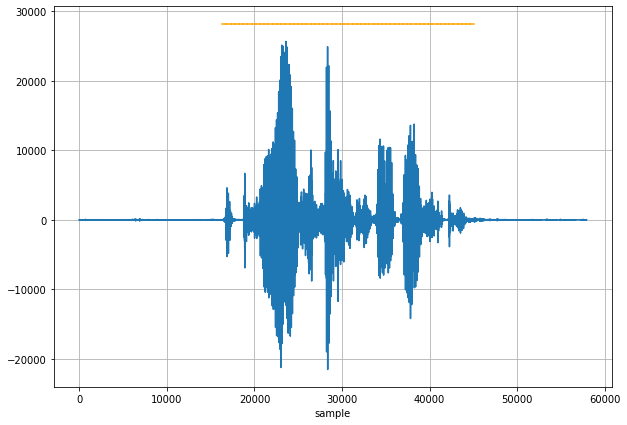

In [4]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.io import wavfile
import webrtcvad
import struct

train_audio_path = "."      # This line is different.
filename = 'english-0.wav'  # This line is different.
sample_rate, samples = wavfile.read(os.path.join(train_audio_path, filename))

vad = webrtcvad.Vad()
vad.set_mode(3)

window_duration = 0.03 # duration in seconds
raw_samples = struct.pack("%dh" % len(samples), *samples)
samples_per_window = int(window_duration * sample_rate + 0.5)
bytes_per_sample = 2

segments = []
for start in np.arange(0, len(samples), samples_per_window):
    stop = min(start + samples_per_window, len(samples))
   
    is_speech = vad.is_speech(raw_samples[start * bytes_per_sample: stop * bytes_per_sample], sample_rate = sample_rate)
    segments.append(dict( start = start, stop = stop, is_speech = is_speech))

# Plot the input wav file
plt.figure(figsize = (10,7))
plt.plot(samples)

ymax = max(samples)

# plot segment identifed as speech
for segment in segments:
    if segment['is_speech']:
        plt.plot([ segment['start'], segment['stop'] - 1], [ymax * 1.1, ymax * 1.1], color = 'orange')

plt.xlabel('sample')
plt.grid()

speech_samples = np.concatenate([ samples[segment['start']:segment['stop']] for segment in segments if segment['is_speech']])

import IPython.display as ipd
ipd.Audio(speech_samples, rate=sample_rate)

(EOF)